In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, 'G:\\Mes Documents\\Documents\\Python\\Udemy-Python-for-Machine-Learning-and-Data-Science-Masterclass\\Notes\\13-Support-Vector-Machines')


filepath = 'G:\\Mes Documents\\Documents\\Python\\Udemy-Python-for-Machine-Learning-and-Data-Science-Masterclass\\Notes\\DATA'
df = pd.read_csv(filepath+'\\mouse_viral_study.csv')


In [9]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

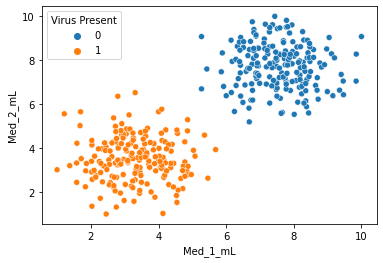

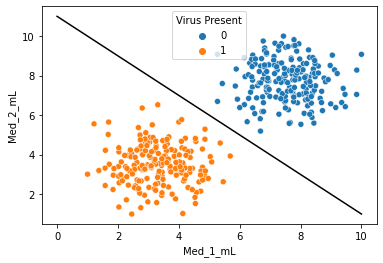

In [13]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

# HYPERPLANE

x=np.linspace(0,10,100)
m=-1
b=11

y = m*x + b

plt.plot(x,y,'black')

In [14]:
from sklearn.svm import SVC

In [15]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

In [16]:
model = SVC(kernel='linear',C=1000)

In [17]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

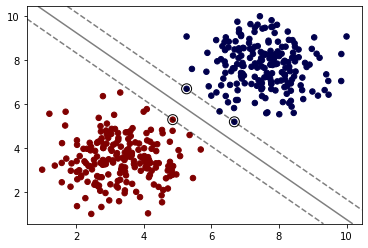

In [20]:
from svm_margin_plot import plot_svm_boundary 
plot_svm_boundary(model,X,y)


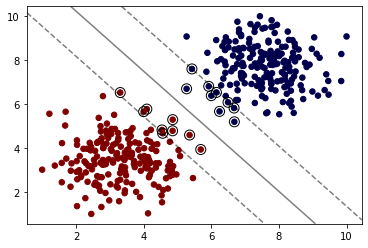

In [24]:
model = SVC(kernel='linear',C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

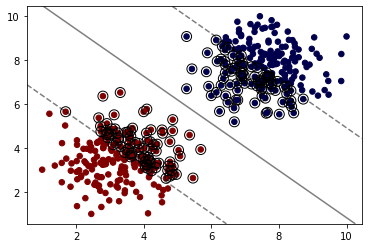

In [23]:
model = SVC(kernel='linear',C=0.001)
model.fit(X,y)
plot_svm_boundary(model,X,y)

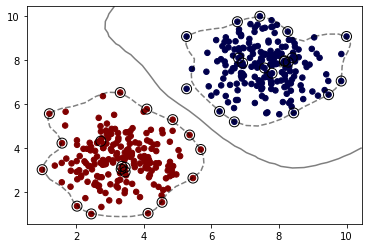

In [26]:
model = SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

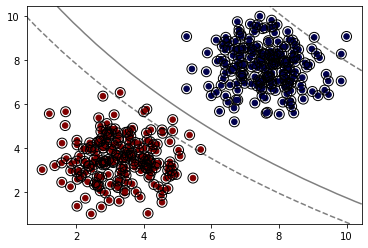

In [27]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

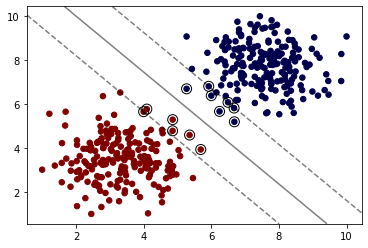

In [28]:
model = SVC(kernel='poly',C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

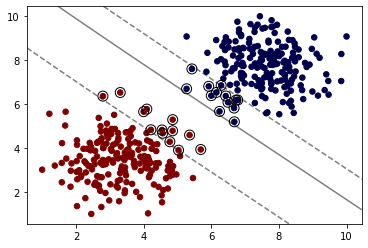

In [35]:
model = SVC(kernel='poly',C=0.00001,degree=5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [39]:
grid = GridSearchCV(svm,param_grid)

In [40]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [41]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [43]:
df = pd.read_csv(filepath+'\\cement_slump.csv')

In [44]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<AxesSubplot:>

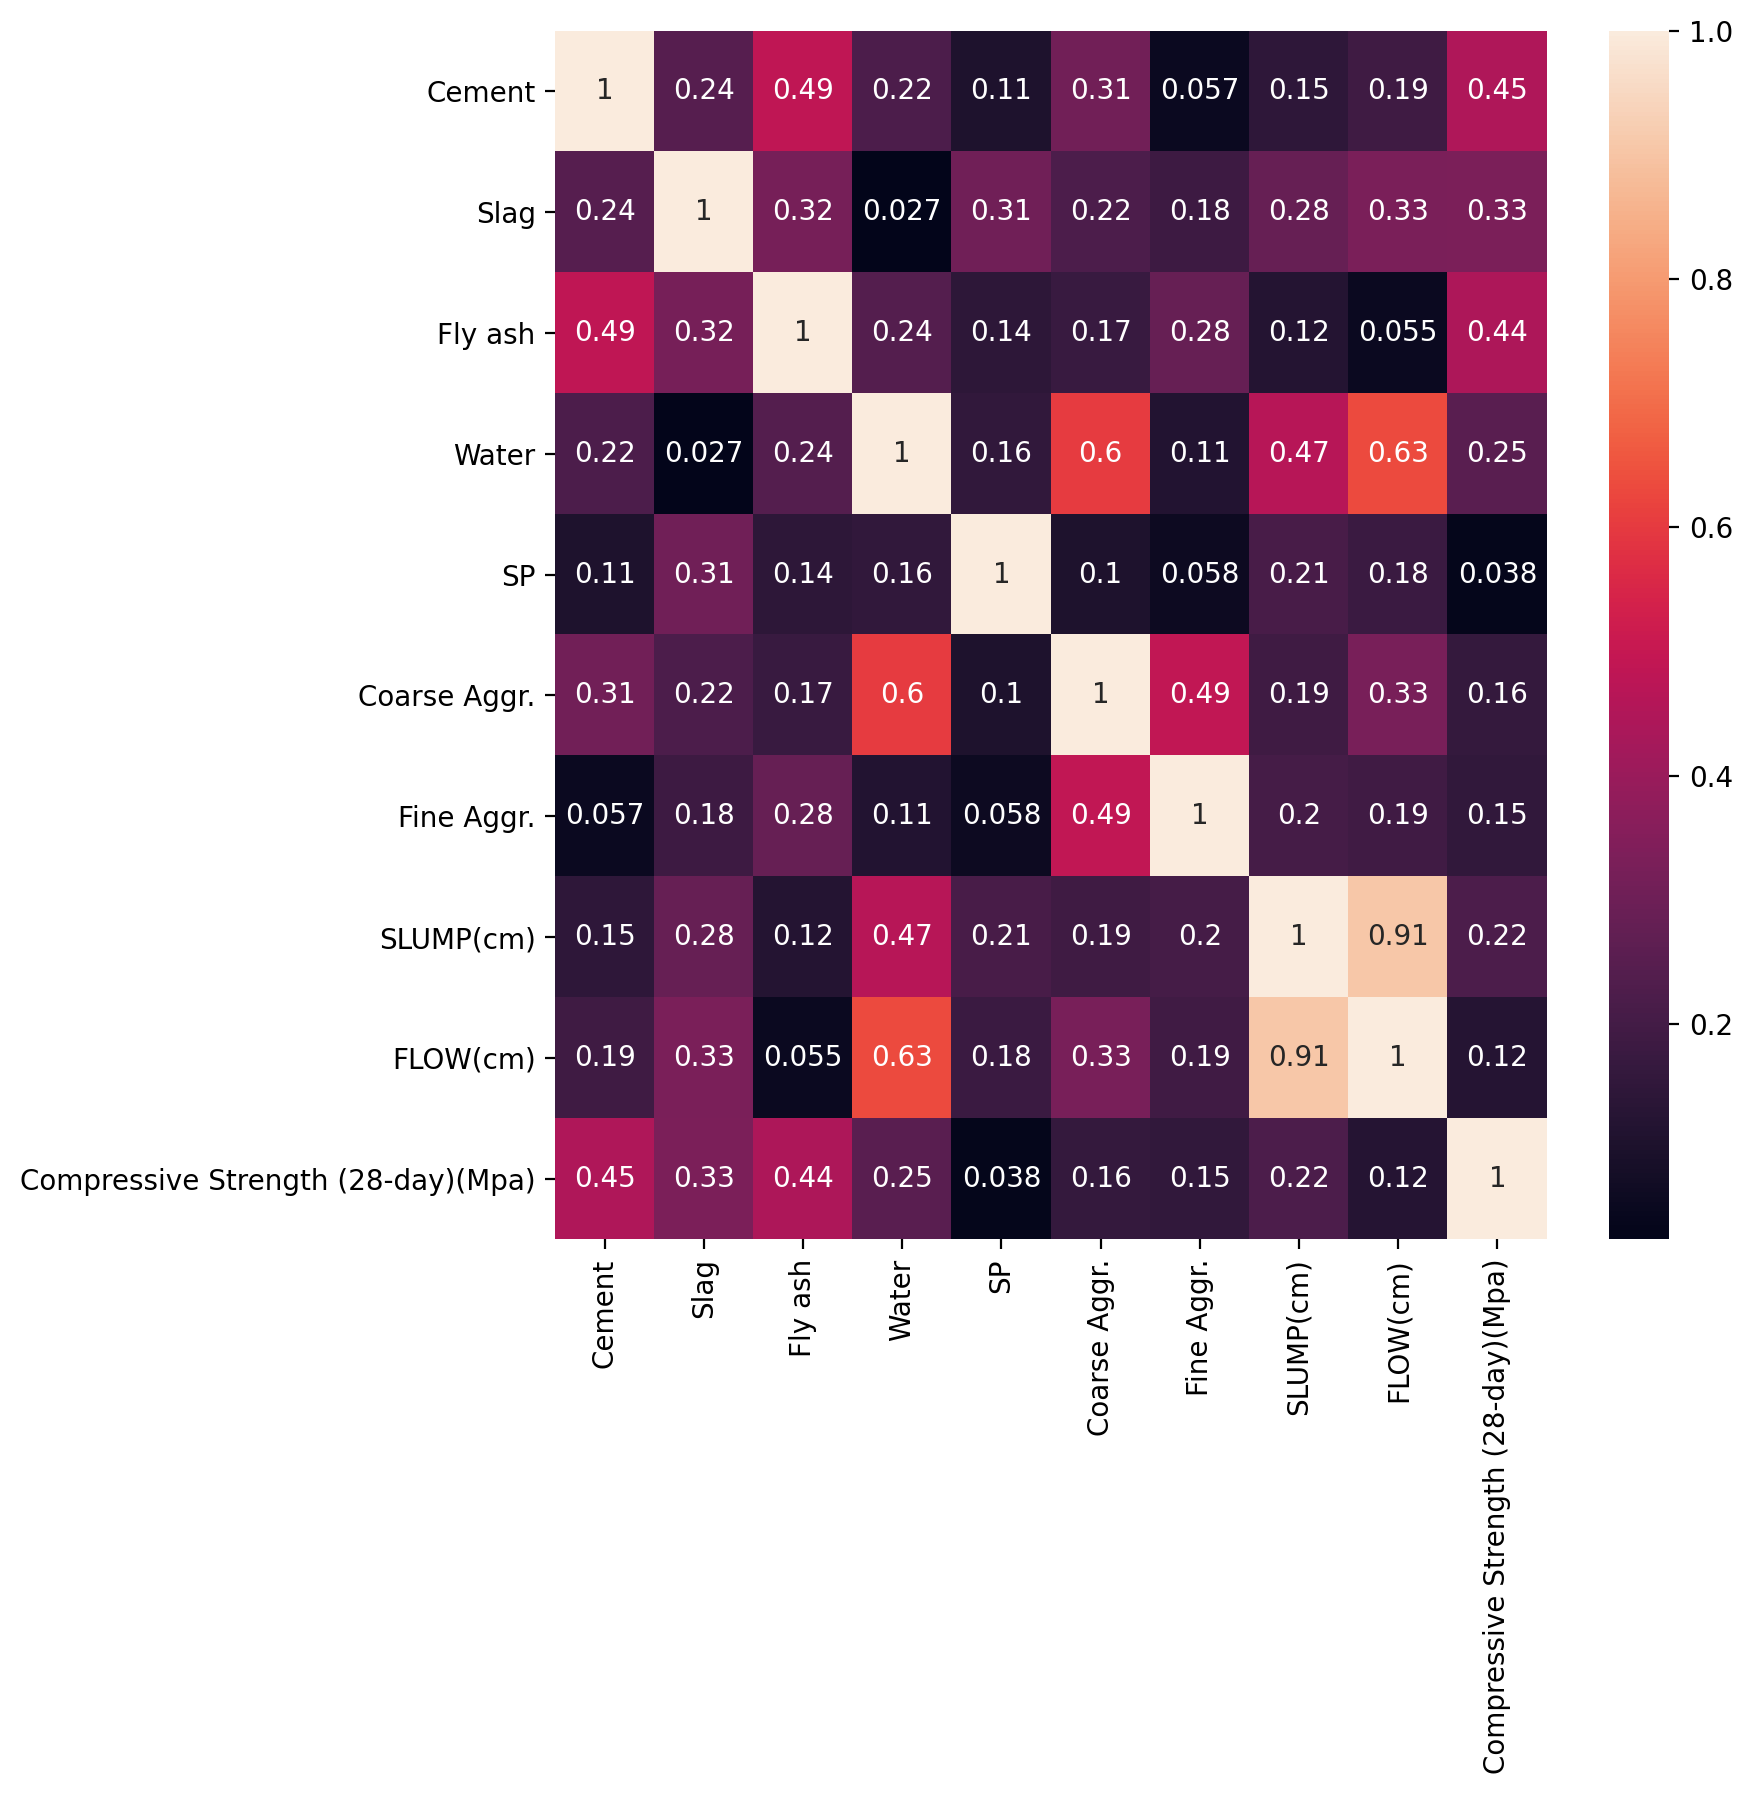

In [47]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr().abs(),annot=True)

In [49]:
X = df.drop(df.columns[-1],axis=1)

In [50]:
y = df[df.columns[-1]]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaled_X_train = scaler.fit_transform(X_train)

In [58]:
scaled_X_test = scaler.transform(X_test)

In [59]:
from sklearn.svm import SVR,LinearSVR

In [60]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`sklearn.svm.LinearSVR` or
 |  :class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies the k

In [62]:
base_model = SVR()

In [63]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [64]:
base_preds = base_model.predict(scaled_X_test)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
MAE = mean_absolute_error(y_test,base_preds)
MAE

5.236902091259178

In [68]:
RMS = np.sqrt(mean_squared_error(y_test,base_preds))
RMS

6.695914838327133

In [69]:
y_test.mean()

36.26870967741935

In [74]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[1,2,3],'epsilon':[0,0.01,0.1,0.5,1,2]}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
svr = SVR()

In [77]:
grid = GridSearchCV(svr,param_grid)

In [78]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [1, 2, 3],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [79]:
grid.best_params_

{'C': 1, 'degree': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [80]:
grid_preds = grid.predict(scaled_X_test)

In [81]:
MAE = mean_absolute_error(grid_preds,y_test)
MAE

2.5128012210762365

In [82]:
RMS = np.sqrt(mean_squared_error(y_test,grid_preds))
RMS

3.178210305119858